In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# set max col display to 100
pd.set_option('display.max_columns', 100)

In [28]:
data_nn = pd.read_csv('results/whobin/fixed_seed_avg.csv',index_col=0)
data_ft = data_nn[data_nn.finetune != 0]
data_nn = data_nn[data_nn.finetune == 0]
data_lrd1 = data_nn[(data_nn.lr_decay == 1) & (data_nn.activation == 'relu')] #only relu for now
data_nn = data_nn[(data_nn.lr_decay != 1) | (data_nn.activation == 'soft')] 

data_relu = data_nn[data_nn.activation == 'relu']
data_relu = data_relu[data_relu.adversarial == False]
data_adv = data_nn[data_nn.adversarial == True]
data_soft = data_nn[data_nn.activation == 'soft']
data_soft = data_soft[data_soft.beta == 2]

data_a = data_adv[data_adv.epsilon == 0.05]
data_a2 = data_adv[data_adv.epsilon == 0.2]

datarelu50 = data_relu[data_relu.epochs == 50]
datarelu30 = data_relu[data_relu.epochs == 30]
datasoft50 = data_soft[data_soft.epochs == 50]
datasoft30 = data_soft[data_soft.epochs == 30]
dataa50 = data_a[data_a.epochs == 50]
dataa30 = data_a[data_a.epochs == 30]
dataa250 = data_a2[data_a2.epochs == 50]
dataa230 = data_a2[data_a2.epochs == 30]

datarelut1 = data_relu[data_relu.threshold == 0.1]
datarelut3 = data_relu[data_relu.threshold == 0.3]
datasoftt1 = data_soft[data_soft.threshold == 0.1] 
datasoftt3 = data_soft[data_soft.threshold == 0.3]
dataat1 = data_a[data_a.threshold == 0.1]
dataat3 = data_a[data_a.threshold == 0.3]
dataa2t1 = data_a2[data_a2.threshold == 0.1]
dataa2t3 = data_a2[data_a2.threshold == 0.3]

datarelu50wd0 = datarelu50[datarelu50.weight_decay == 0]
datasoft50wd0 = datasoft50[datasoft50.weight_decay == 0]
dataa50wd0 = dataa50[dataa50.weight_decay == 0]
dataa250wd0 = dataa250[dataa250.weight_decay == 0]
datarelu30wd0 = datarelu30[datarelu30.weight_decay == 0]
datasoft30wd0 = datasoft30[datasoft30.weight_decay == 0]
dataa30wd0 = dataa30[dataa30.weight_decay == 0]
dataa230wd0 = dataa230[dataa230.weight_decay == 0]
datarelut1wd0 = datarelut1[datarelut1.weight_decay == 0]
datasoftt1wd0 = datasoftt1[datasoftt1.weight_decay == 0]
dataat1wd0 = dataat1[dataat1.weight_decay == 0]
dataa2t1wd0 = dataa2t1[dataa2t1.weight_decay == 0]
datarelut3wd0 = datarelut3[datarelut3.weight_decay == 0]
datasoftt3wd0 = datasoftt3[datasoftt3.weight_decay == 0]
dataat3wd0 = dataat3[dataat3.weight_decay == 0]
dataa2t3wd0 = dataa2t3[dataa2t3.weight_decay == 0]

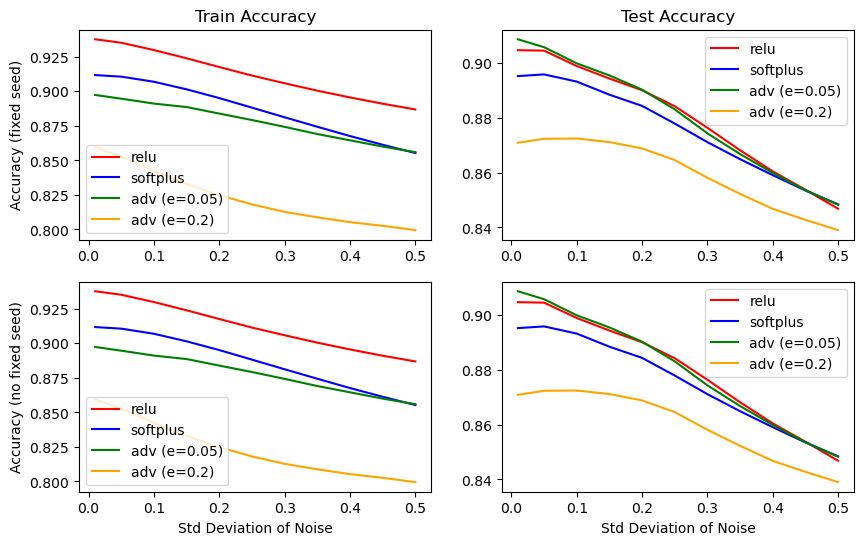

In [29]:
fig, axs = plt.subplots(2, 2, figsize=(10, 6))
datarelu50wd0 = datarelu50wd0.sort_values(by=['threshold'])
dataa50wd0 = dataa50wd0.sort_values(by=['threshold'])
datasoft50wd0 = datasoft50wd0.sort_values(by=['threshold']) 
dataa250wd0 = dataa250wd0.sort_values(by=['threshold']) 
# plot the data
axs[0,0].plot(datarelu50wd0['threshold'], datarelu50wd0['train_acc'], label='relu',color='red')
axs[0,1].plot(datarelu50wd0['threshold'], datarelu50wd0['test_acc'], label='relu',color='red')
axs[0,0].plot(datasoft50wd0['threshold'], datasoft50wd0['train_acc'], label='softplus',color='blue')
axs[0,1].plot(datasoft50wd0['threshold'], datasoft50wd0['test_acc'], label='softplus',color='blue')
axs[0,0].plot(dataa50wd0['threshold'], dataa50wd0['train_acc'], label='adv (e=0.05)', color='green')
axs[0,1].plot(dataa50wd0['threshold'], dataa50wd0['test_acc'], label='adv (e=0.05)',color='green')
axs[0,0].plot(dataa250wd0['threshold'], dataa250wd0['train_acc'], label='adv (e=0.2)',color='orange')
axs[0,1].plot(dataa250wd0['threshold'], dataa250wd0['test_acc'], label='adv (e=0.2)',color='orange')

axs[1,0].plot(datarelu50wd0['threshold'], datarelu50wd0['train_acc'], label='relu',color='red')
axs[1,1].plot(datarelu50wd0['threshold'], datarelu50wd0['test_acc'], label='relu',color='red')
axs[1,0].plot(datasoft50wd0['threshold'], datasoft50wd0['train_acc'], label='softplus',color='blue')
axs[1,1].plot(datasoft50wd0['threshold'], datasoft50wd0['test_acc'], label='softplus',color='blue')
axs[1,0].plot(dataa50wd0['threshold'], dataa50wd0['train_acc'], label='adv (e=0.05)', color='green')
axs[1,1].plot(dataa50wd0['threshold'], dataa50wd0['test_acc'], label='adv (e=0.05)',color='green')
axs[1,0].plot(dataa250wd0['threshold'], dataa250wd0['train_acc'], label='adv (e=0.2)',color='orange')
axs[1,1].plot(dataa250wd0['threshold'], dataa250wd0['test_acc'], label='adv (e=0.2)',color='orange')

# add a legend
axs[0,0].legend()
axs[0,1].legend()
axs[1,0].legend()
axs[1,1].legend()
# set the title
axs[0,0].set_title('Train Accuracy')
axs[0,1].set_title('Test Accuracy')
axs[1,0].set_xlabel('Std Deviation of Noise')
axs[1,1].set_xlabel('Std Deviation of Noise')
axs[0,0].set_ylabel('Accuracy (fixed seed)')
axs[1,0].set_ylabel('Accuracy (no fixed seed)')


plt.show()

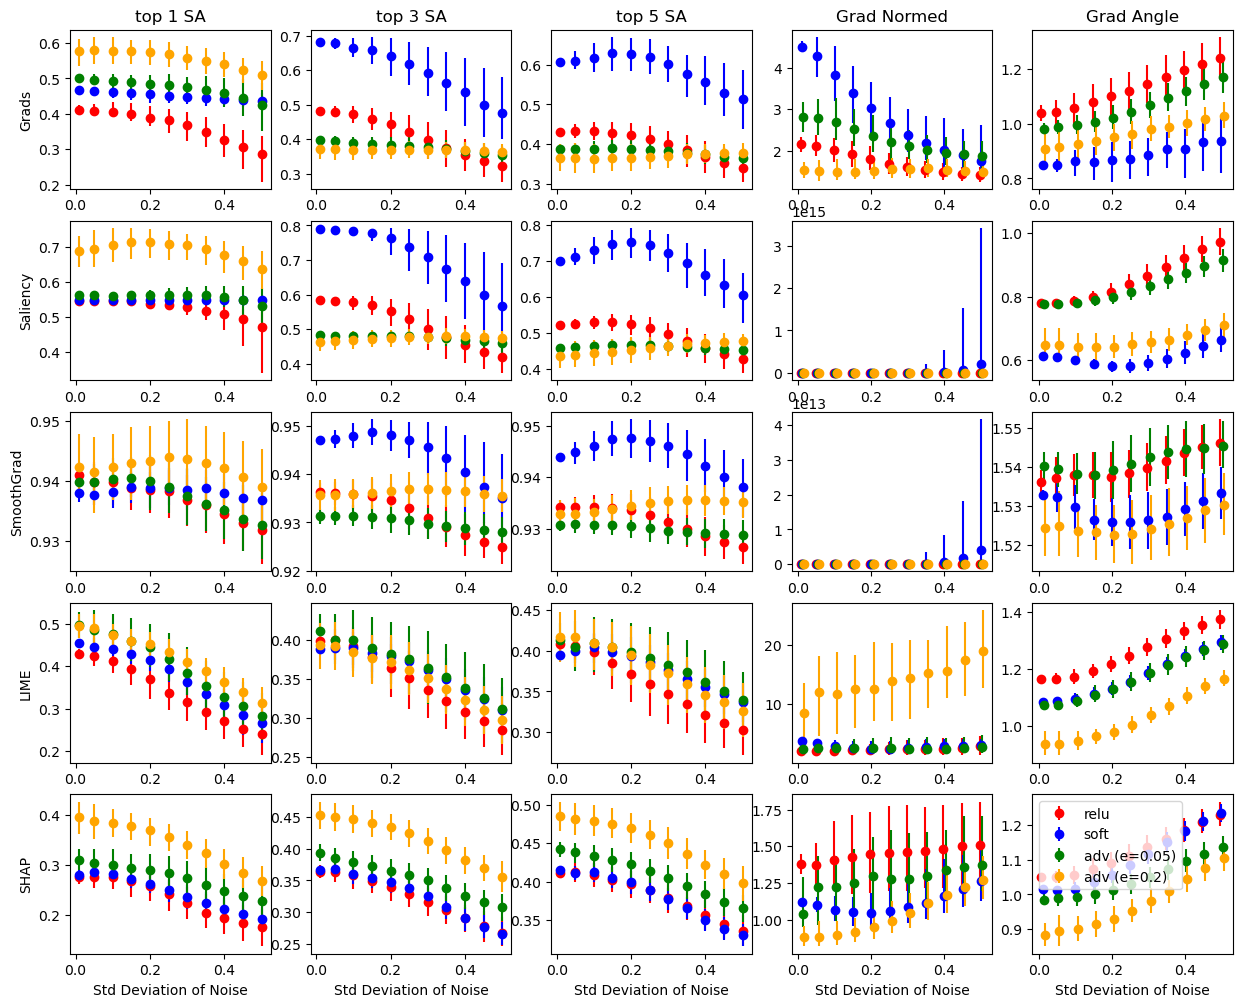

In [30]:
fig, axs = plt.subplots(5, 5, figsize=(15, 12))
pref = ['grad_', 'sal_', 'sg_', 'lime_', 'shap_']
for i in range(5):
    yerr = [datarelu30wd0[pref[i] + 'top_sa_0_p50'] - datarelu30wd0[pref[i] + 'top_sa_0_p10'], datarelu30wd0[pref[i] + 'top_sa_0_p90'] - datarelu30wd0[pref[i] + 'top_sa_0_p50']]
    axs[i,0].errorbar(datarelu30wd0['threshold'], datarelu30wd0[pref[i] + 'top_sa_0_p50'], yerr=yerr, label='relu', color='red', fmt='o')
    yerr = [datasoft30wd0[pref[i] + 'top_sa_0_p50'] - datasoft30wd0[pref[i] + 'top_sa_0_p10'], datasoft30wd0[pref[i] + 'top_sa_0_p90'] - datasoft30wd0[pref[i] + 'top_sa_0_p50']]
    axs[i,0].errorbar(datasoft30wd0['threshold'], datasoft30wd0[pref[i] + 'top_sa_0_p50'], yerr=yerr, label='softplus', color='blue', fmt='o')
    yerr = [dataa30wd0[pref[i] + 'top_sa_0'] - dataa30wd0[pref[i] + 'top_sa_0_p10'], dataa30wd0[pref[i] + 'top_sa_0_p90'] - dataa30wd0[pref[i] + 'top_sa_0']]
    axs[i,0].errorbar(dataa30wd0['threshold'], dataa30wd0[pref[i] + 'top_sa_0'], yerr=yerr, label='adv (e=0.05)', color='green', fmt='o')
    yerr = [dataa230wd0[pref[i] + 'top_sa_0'] - dataa230wd0[pref[i] + 'top_sa_0_p10'], dataa230wd0[pref[i] + 'top_sa_0_p90'] - dataa230wd0[pref[i] + 'top_sa_0']]
    axs[i,0].errorbar(dataa230wd0['threshold'], dataa230wd0[pref[i] + 'top_sa_0'], yerr=yerr, label='adv (e=0.2)', color='orange', fmt='o')

    yerr = [datarelu30wd0[pref[i] + 'top_sa_2'] - datarelu30wd0[pref[i] + 'top_sa_2_p10'], datarelu30wd0[pref[i] + 'top_sa_2_p90'] - datarelu30wd0[pref[i] + 'top_sa_2']]
    axs[i,1].errorbar(datarelu30wd0['threshold'], datarelu30wd0[pref[i] + 'top_sa_2'], yerr=yerr, label='relu', color='red', fmt='o')
    yerr = [datasoft30wd0[pref[i] + 'top_sa_2'] - datasoft30wd0[pref[i] + 'top_sa_2_p10'], datasoft30wd0[pref[i] + 'top_sa_2_p90'] - datasoft30wd0[pref[i] + 'top_sa_2']]
    axs[i,1].errorbar(datasoft30wd0['threshold'], datasoft30wd0[pref[i] + 'top_sa_2'], yerr=yerr, label='softplus', color='blue', fmt='o')
    yerr = [dataa30wd0[pref[i] + 'top_sa_2'] - dataa30wd0[pref[i] + 'top_sa_2_p10'], dataa30wd0[pref[i] + 'top_sa_2_p90'] - dataa30wd0[pref[i] + 'top_sa_2']]
    axs[i,1].errorbar(dataa30wd0['threshold'], dataa30wd0[pref[i] + 'top_sa_2'], yerr=yerr, label='adv (e=0.05)', color='green', fmt='o')
    yerr = [dataa230wd0[pref[i] + 'top_sa_2'] - dataa230wd0[pref[i] + 'top_sa_2_p10'], dataa230wd0[pref[i] + 'top_sa_2_p90'] - dataa230wd0[pref[i] + 'top_sa_2']]
    axs[i,1].errorbar(dataa230wd0['threshold'], dataa230wd0[pref[i] + 'top_sa_2'], yerr=yerr, label='adv (e=0.2)', color='orange', fmt='o')

    yerr = [datarelu30wd0[pref[i] + 'top_sa_4'] - datarelu30wd0[pref[i] + 'top_sa_4_p10'], datarelu30wd0[pref[i] + 'top_sa_4_p90'] - datarelu30wd0[pref[i] + 'top_sa_4']]
    axs[i,2].errorbar(datarelu30wd0['threshold'], datarelu30wd0[pref[i] + 'top_sa_4'], yerr=yerr, label='relu', color='red', fmt='o')
    yerr = [datasoft30wd0[pref[i] + 'top_sa_4'] - datasoft30wd0[pref[i] + 'top_sa_4_p10'], datasoft30wd0[pref[i] + 'top_sa_4_p90'] - datasoft30wd0[pref[i] + 'top_sa_4']]
    axs[i,2].errorbar(datasoft30wd0['threshold'], datasoft30wd0[pref[i] + 'top_sa_4'], yerr=yerr, label='softplus', color='blue', fmt='o')
    yerr = [dataa30wd0[pref[i] + 'top_sa_4'] - dataa30wd0[pref[i] + 'top_sa_4_p10'], dataa30wd0[pref[i] + 'top_sa_4_p90'] - dataa30wd0[pref[i] + 'top_sa_4']]
    axs[i,2].errorbar(dataa30wd0['threshold'], dataa30wd0[pref[i] + 'top_sa_4'], yerr=yerr, label='adv (e=0.05)', color='green', fmt='o')
    yerr = [dataa230wd0[pref[i] + 'top_sa_4'] - dataa230wd0[pref[i] + 'top_sa_4_p10'], dataa230wd0[pref[i] + 'top_sa_4_p90'] - dataa230wd0[pref[i] + 'top_sa_4']]
    axs[i,2].errorbar(dataa230wd0['threshold'], dataa230wd0[pref[i] + 'top_sa_4'], yerr=yerr, label='adv (e=0.2)', color='orange', fmt='o')

    yerr = [datarelu30wd0[pref[i] + 'gradient_normed'] - datarelu30wd0[pref[i] + 'gradient_normed_p10'], datarelu30wd0[pref[i] + 'gradient_normed_p90'] - datarelu30wd0[pref[i] + 'gradient_normed']]
    axs[i,3].errorbar(datarelu30wd0['threshold'] - 0.003, datarelu30wd0[pref[i] + 'gradient_normed'], yerr=yerr, label='relu', color='red', fmt='o')
    yerr = [datasoft30wd0[pref[i] + 'gradient_normed_p50'] - datasoft30wd0[pref[i] + 'gradient_normed_p10'], datasoft30wd0[pref[i] + 'gradient_normed_p90'] - datasoft30wd0[pref[i] + 'gradient_normed_p50']]
    axs[i,3].errorbar(datasoft30wd0['threshold'], datasoft30wd0[pref[i] + 'gradient_normed_p50'], yerr=yerr, label='soft', color='blue', fmt='o')
    yerr = [dataa30wd0[pref[i] + 'gradient_normed_p50'] - dataa30wd0[pref[i] + 'gradient_normed_p10'], dataa30wd0[pref[i] + 'gradient_normed_p90'] - dataa30wd0[pref[i] + 'gradient_normed_p50']]
    axs[i,3].errorbar(dataa30wd0['threshold'] + 0.003, dataa30wd0[pref[i] + 'gradient_normed_p50'], yerr=yerr, label='adv (e=0.05)', color='green', fmt='o')
    yerr = [dataa230wd0[pref[i] + 'gradient_normed_p50'] - dataa230wd0[pref[i] + 'gradient_normed_p10'], dataa230wd0[pref[i] + 'gradient_normed_p90'] - dataa230wd0[pref[i] + 'gradient_normed_p50']]
    axs[i,3].errorbar(dataa230wd0['threshold'] + 0.006, dataa230wd0[pref[i] + 'gradient_normed_p50'], yerr=yerr, label='adv (e=0.2)', color='orange', fmt='o')

    yerr = [datarelu30wd0[pref[i] + 'gradient_angle'] - datarelu30wd0[pref[i] + 'gradient_angle_p10'], datarelu30wd0[pref[i] + 'gradient_angle_p90'] - datarelu30wd0[pref[i] + 'gradient_angle']]
    axs[i,4].errorbar(datarelu30wd0['threshold'] - 0.003, datarelu30wd0[pref[i] + 'gradient_angle'], yerr=yerr, label='relu', color='red', fmt='o')
    yerr = [datasoft30wd0[pref[i] + 'gradient_angle'] - datasoft30wd0[pref[i] + 'gradient_angle_p10'], datasoft30wd0[pref[i] + 'gradient_angle_p90'] - datasoft30wd0[pref[i] + 'gradient_angle']]
    axs[i,4].errorbar(datasoft30wd0['threshold'], datasoft30wd0[pref[i] + 'gradient_angle'], yerr=yerr, label='soft', color='blue', fmt='o')
    yerr = [dataa30wd0[pref[i] + 'gradient_angle'] - dataa30wd0[pref[i] + 'gradient_angle_p10'], dataa30wd0[pref[i] + 'gradient_angle_p90'] - dataa30wd0[pref[i] + 'gradient_angle']]
    axs[i,4].errorbar(dataa30wd0['threshold'] + 0.003, dataa30wd0[pref[i] + 'gradient_angle'], yerr=yerr, label='adv (e=0.05)', color='green', fmt='o')
    yerr = [dataa230wd0[pref[i] + 'gradient_angle'] - dataa230wd0[pref[i] + 'gradient_angle_p10'], dataa230wd0[pref[i] + 'gradient_angle_p90'] - dataa230wd0[pref[i] + 'gradient_angle']]
    axs[i,4].errorbar(dataa230wd0['threshold'] + 0.006, dataa230wd0[pref[i] + 'gradient_angle'], yerr=yerr, label='adv (e=0.2)', color='orange', fmt='o')

    axs[4,i].set_xlabel('Std Deviation of Noise')
# set the title
axs[0,0].set_title('top 1 SA')
axs[0,1].set_title('top 3 SA')
axs[0,2].set_title('top 5 SA')
axs[0,3].set_title('Grad Normed')
axs[0,4].set_title('Grad Angle')

axs[0,0].set_ylabel('Grads')
axs[1,0].set_ylabel('Saliency')
axs[2,0].set_ylabel('SmoothGrad')
axs[3,0].set_ylabel('LIME')
axs[4,0].set_ylabel('SHAP')

axs[4,4].legend()


plt.show()


In [31]:
data_nn = pd.read_csv('results/whobin/fixed_seed_avg.csv',index_col=0)
data_soft = data_nn[data_nn.activation == 'soft']
data_soft_beta = data_soft[data_soft.epochs == 50]
data_soft_beta = data_soft_beta[data_soft_beta.threshold == 0.1]
data_soft_beta = data_soft_beta[data_soft_beta.weight_decay == 0]

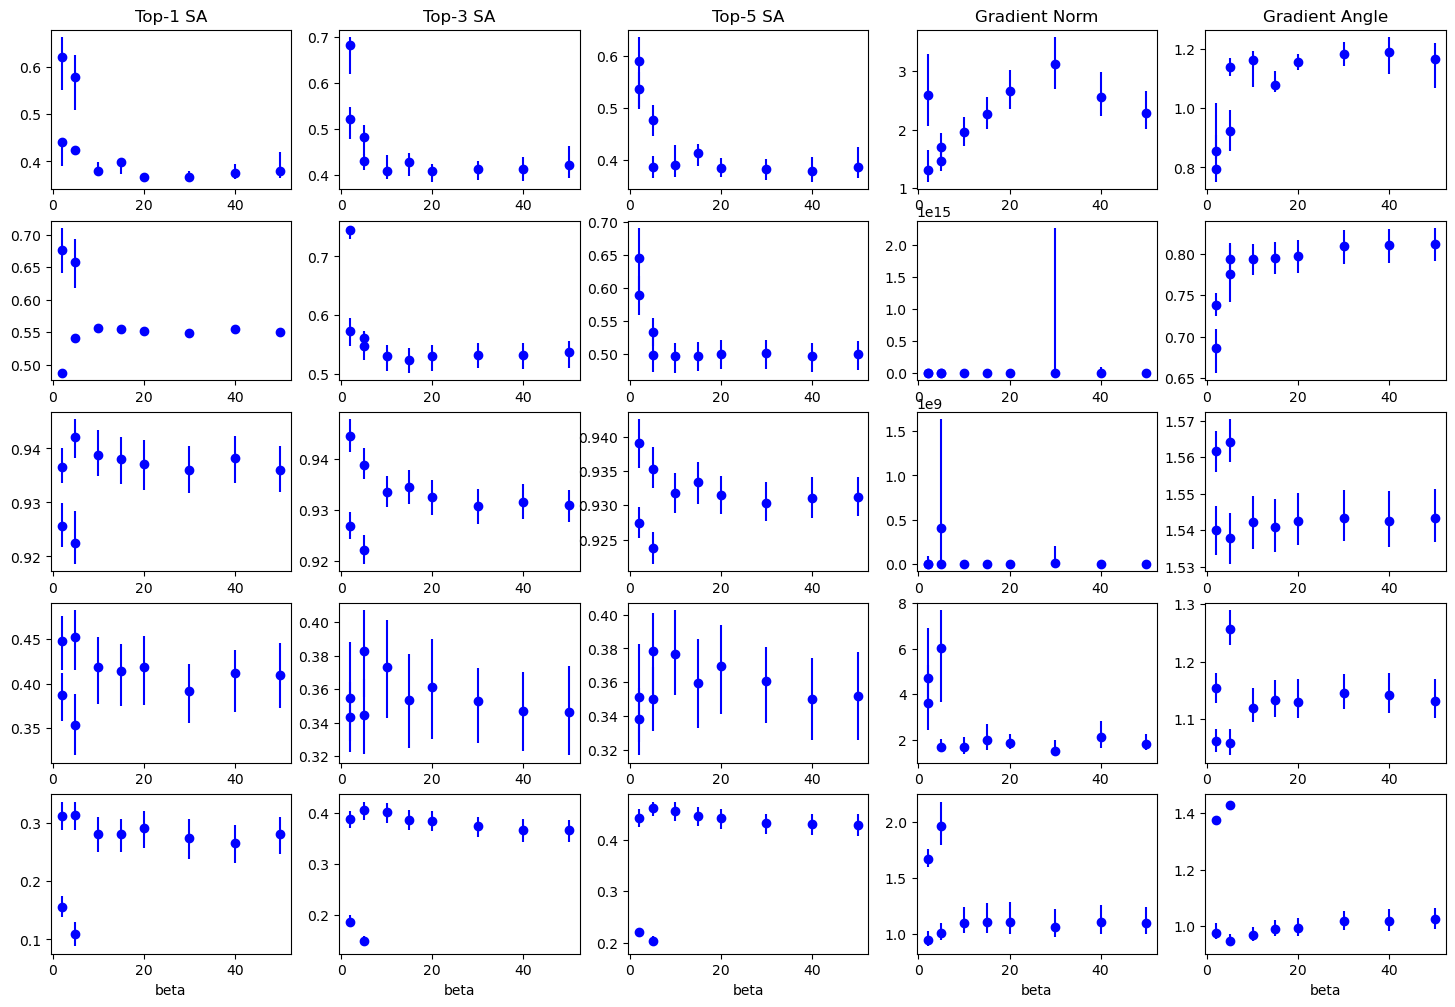

In [32]:
columns = ['top_sa_0', 'top_sa_2', 'top_sa_4', 'gradient_normed', 'gradient_angle']
fig, axs = plt.subplots(5, 5, figsize=(18, 12))
color_map = {0: 'blue', 1: 'green', 2: 'violet', 3: 'orange', 4: 'red'}
j_idx = 0
for j in ['grad', 'sal', 'sg', 'lime', 'shap']: 
    c_idx = 0
    for c in columns:
        y_err = [data_soft_beta[j + "_" + c + "_p50"] - data_soft_beta[j + "_" + c + "_p10"], 
                    data_soft_beta[j + "_" + c + "_p90"] - data_soft_beta[j + "_" + c + "_p50"]]
        
        axs[j_idx, c_idx].errorbar(data_soft_beta['beta'], data_soft_beta[j + "_" + c + "_p50"], yerr=y_err, label='relu', color='blue', fmt='o')
        
    
        axs[4, j_idx].set_xlabel('beta')
        c_idx += 1
    j_idx += 1

axs[0,0].set_title('Top-1 SA')
axs[0,1].set_title('Top-3 SA')
axs[0,2].set_title('Top-5 SA')
axs[0,3].set_title('Gradient Norm')
axs[0,4].set_title('Gradient Angle')
plt.show()

## Weight decay / fine tuning

In [36]:
datalim = data_ft[data_ft.threshold == 0.3]
data_ft_wd0 = datalim[(datalim.weight_decay == 0) & (datalim.activation == 'relu')]
data_ft_wds = datalim[(datalim.weight_decay == 0.0001) & (datalim.activation == 'relu')]
data_ft_wdm = datalim[(datalim.weight_decay == 0.001) & (datalim.activation == 'relu')]
data_ft_wdl = datalim[(datalim.weight_decay == 0.01) & (datalim.activation == 'relu')]

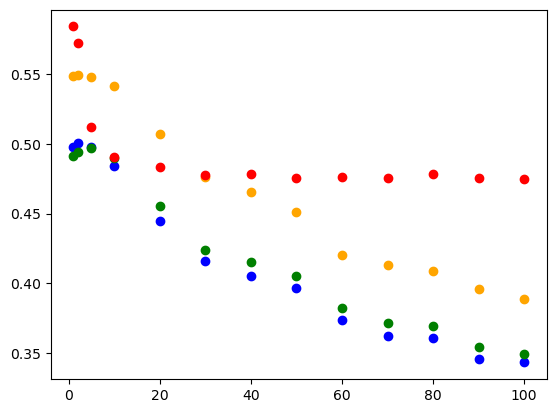

In [37]:
plt.scatter(data_ft_wd0.epochs, data_ft_wd0.sal_top_sa_2, label = '0', color='blue')
plt.scatter(data_ft_wds.epochs, data_ft_wds.sal_top_sa_2, label = '0.0001', color='green')
plt.scatter(data_ft_wdm.epochs, data_ft_wdm.sal_top_sa_2, label = '0.001', color='orange')
plt.scatter(data_ft_wdl.epochs, data_ft_wdl.sal_top_sa_2, label = '0.01', color='red')

In [38]:
datalimt = data_ft[data_ft.epochs == 100]
data_ftt_wd0 = datalimt[(datalimt.weight_decay == 0) & (datalimt.activation == 'relu')]
data_ftt_wds = datalimt[(datalimt.weight_decay == 0.0001) & (datalimt.activation == 'relu')]
data_ftt_wdm = datalimt[(datalimt.weight_decay == 0.001) & (datalimt.activation == 'relu')]
data_ftt_wdl = datalimt[(datalimt.weight_decay == 0.01) & (datalimt.activation == 'relu')]

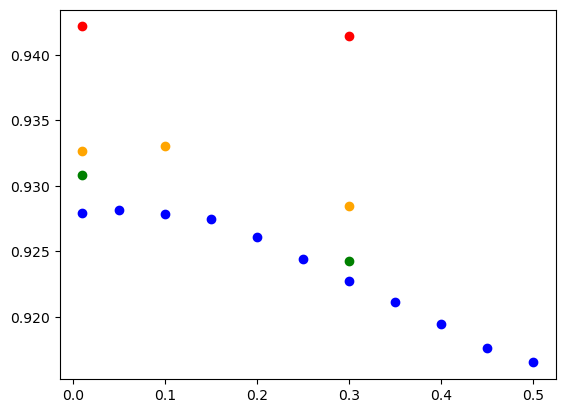

In [39]:
plt.scatter(data_ftt_wd0.threshold, data_ftt_wd0.sg_top_sa_0, label = '0', color='blue')
plt.scatter(data_ftt_wds.threshold, data_ftt_wds.sg_top_sa_0, label = '0.0001', color='green')
plt.scatter(data_ftt_wdm.threshold, data_ftt_wdm.sg_top_sa_0, label = '0.001', color='orange')
plt.scatter(data_ftt_wdl.threshold, data_ftt_wdl.sg_top_sa_0, label = '0.01', color='red')

Text(0, 0.5, 'SHAP')

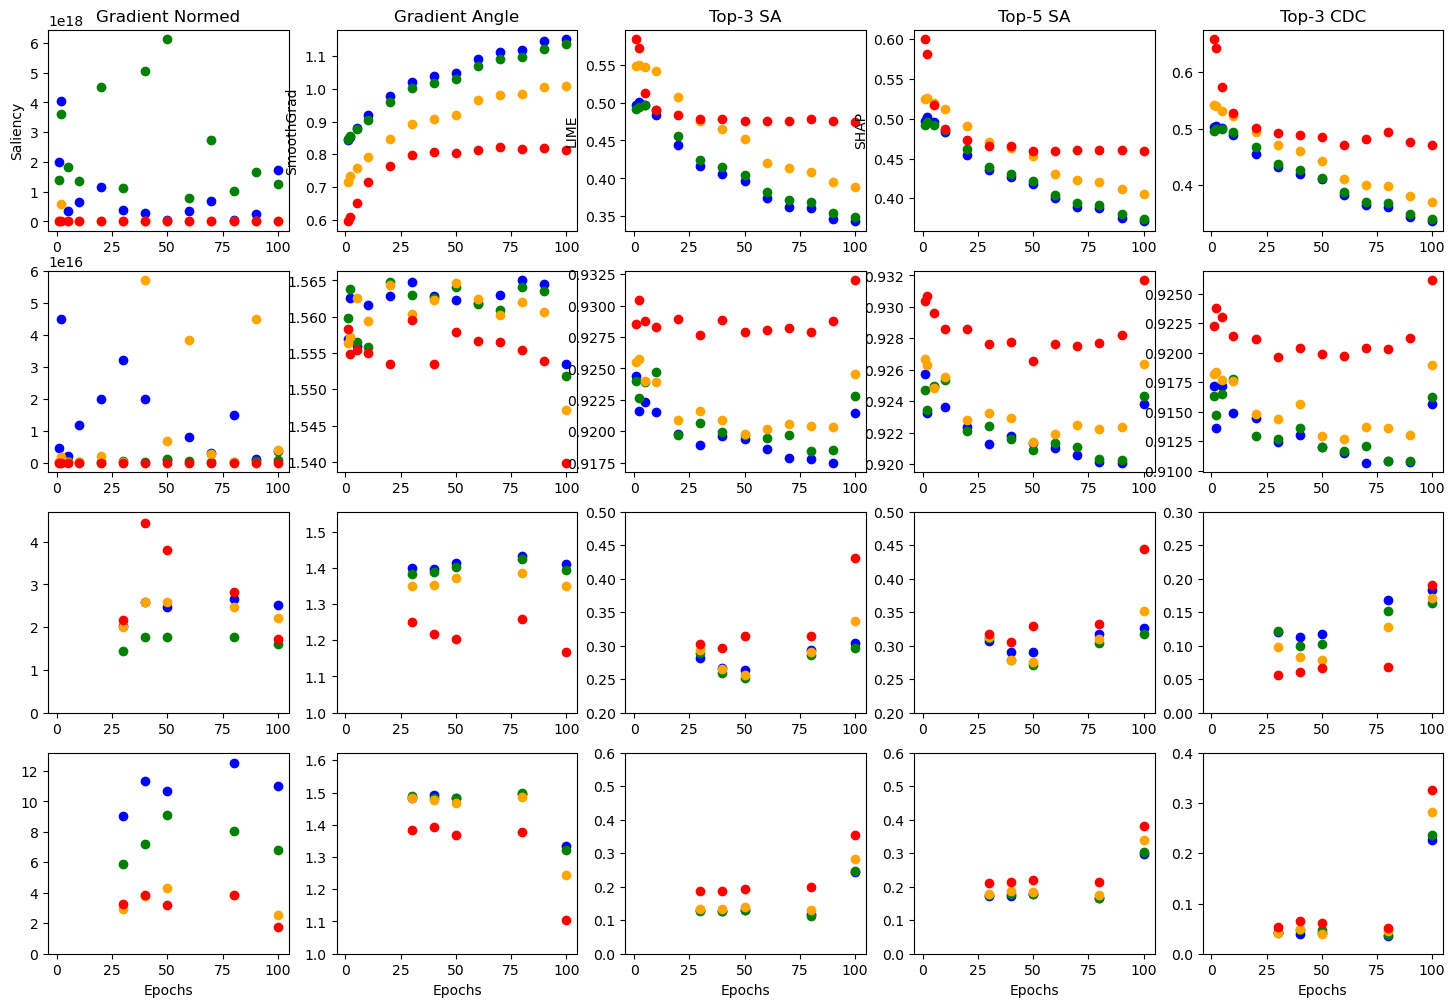

In [40]:
fig, axs = plt.subplots(4, 5, figsize=(18, 12))
axs[0,0].scatter(data_ft_wd0.epochs, data_ft_wd0.sal_gradient_normed, label = '0', color='blue')
axs[0,0].scatter(data_ft_wds.epochs, data_ft_wds.sal_gradient_normed, label = '0.0001', color='green')
axs[0,0].scatter(data_ft_wdm.epochs, data_ft_wdm.sal_gradient_normed, label = '0.001', color='orange')
axs[0,0].scatter(data_ft_wdl.epochs, data_ft_wdl.sal_gradient_normed, label = '0.01', color='red')

axs[0,1].scatter(data_ft_wd0.epochs, data_ft_wd0.sal_gradient_angle, label = '0', color='blue')
axs[0,1].scatter(data_ft_wds.epochs, data_ft_wds.sal_gradient_angle, label = '0.0001', color='green')
axs[0,1].scatter(data_ft_wdm.epochs, data_ft_wdm.sal_gradient_angle, label = '0.001', color='orange')
axs[0,1].scatter(data_ft_wdl.epochs, data_ft_wdl.sal_gradient_angle, label = '0.01', color='red')

axs[0,2].scatter(data_ft_wd0.epochs, data_ft_wd0.sal_top_sa_2, label = '0', color='blue')
axs[0,2].scatter(data_ft_wds.epochs, data_ft_wds.sal_top_sa_2, label = '0.0001', color='green')
axs[0,2].scatter(data_ft_wdm.epochs, data_ft_wdm.sal_top_sa_2, label = '0.001', color='orange')
axs[0,2].scatter(data_ft_wdl.epochs, data_ft_wdl.sal_top_sa_2, label = '0.01', color='red')

axs[0,3].scatter(data_ft_wd0.epochs, data_ft_wd0.sal_top_sa_4, label = '0', color='blue')
axs[0,3].scatter(data_ft_wds.epochs, data_ft_wds.sal_top_sa_4, label = '0.0001', color='green')
axs[0,3].scatter(data_ft_wdm.epochs, data_ft_wdm.sal_top_sa_4, label = '0.001', color='orange')
axs[0,3].scatter(data_ft_wdl.epochs, data_ft_wdl.sal_top_sa_4, label = '0.01', color='red')

axs[0,4].scatter(data_ft_wd0.epochs,1- data_ft_wd0.sal_top_cdc_2, label = '0', color='blue')
axs[0,4].scatter(data_ft_wds.epochs, 1-data_ft_wds.sal_top_cdc_2, label = '0.0001', color='green')
axs[0,4].scatter(data_ft_wdm.epochs, 1-data_ft_wdm.sal_top_cdc_2, label = '0.001', color='orange')
axs[0,4].scatter(data_ft_wdl.epochs, 1-data_ft_wdl.sal_top_cdc_2, label = '0.01', color='red')

axs[1,0].scatter(data_ft_wd0.epochs, data_ft_wd0.sg_gradient_normed, label = '0', color='blue')
axs[1,0].scatter(data_ft_wds.epochs, data_ft_wds.sg_gradient_normed, label = '0.0001', color='green')
axs[1,0].scatter(data_ft_wdm.epochs, data_ft_wdm.sg_gradient_normed, label = '0.001', color='orange')
axs[1,0].scatter(data_ft_wdl.epochs, data_ft_wdl.sg_gradient_normed, label = '0.01', color='red')

axs[1,1].scatter(data_ft_wd0.epochs, data_ft_wd0.sg_gradient_angle, label = '0', color='blue')
axs[1,1].scatter(data_ft_wds.epochs, data_ft_wds.sg_gradient_angle, label = '0.0001', color='green')
axs[1,1].scatter(data_ft_wdm.epochs, data_ft_wdm.sg_gradient_angle, label = '0.001', color='orange')
axs[1,1].scatter(data_ft_wdl.epochs, data_ft_wdl.sg_gradient_angle, label = '0.01', color='red')

axs[1,2].scatter(data_ft_wd0.epochs, data_ft_wd0.sg_top_sa_2, label = '0', color='blue')
axs[1,2].scatter(data_ft_wds.epochs, data_ft_wds.sg_top_sa_2, label = '0.0001', color='green')
axs[1,2].scatter(data_ft_wdm.epochs, data_ft_wdm.sg_top_sa_2, label = '0.001', color='orange')
axs[1,2].scatter(data_ft_wdl.epochs, data_ft_wdl.sg_top_sa_2, label = '0.01', color='red')

axs[1,3].scatter(data_ft_wd0.epochs, data_ft_wd0.sg_top_sa_4, label = '0', color='blue')
axs[1,3].scatter(data_ft_wds.epochs, data_ft_wds.sg_top_sa_4, label = '0.0001', color='green')
axs[1,3].scatter(data_ft_wdm.epochs, data_ft_wdm.sg_top_sa_4, label = '0.001', color='orange')
axs[1,3].scatter(data_ft_wdl.epochs, data_ft_wdl.sg_top_sa_4, label = '0.01', color='red')

axs[1,4].scatter(data_ft_wd0.epochs,1- data_ft_wd0.sg_top_cdc_2, label = '0', color='blue')
axs[1,4].scatter(data_ft_wds.epochs, 1-data_ft_wds.sg_top_cdc_2, label = '0.0001', color='green')
axs[1,4].scatter(data_ft_wdm.epochs, 1-data_ft_wdm.sg_top_cdc_2, label = '0.001', color='orange')
axs[1,4].scatter(data_ft_wdl.epochs, 1-data_ft_wdl.sg_top_cdc_2, label = '0.01', color='red')

axs[2,0].scatter(data_ft_wd0.epochs, data_ft_wd0.lime_gradient_normed, label = '0', color='blue')
axs[2,0].scatter(data_ft_wds.epochs, data_ft_wds.lime_gradient_normed, label = '0.0001', color='green')
axs[2,0].scatter(data_ft_wdm.epochs, data_ft_wdm.lime_gradient_normed, label = '0.001', color='orange')
axs[2,0].scatter(data_ft_wdl.epochs, data_ft_wdl.lime_gradient_normed, label = '0.01', color='red')

axs[2,1].scatter(data_ft_wd0.epochs, data_ft_wd0.lime_gradient_angle, label = '0', color='blue')
axs[2,1].scatter(data_ft_wds.epochs, data_ft_wds.lime_gradient_angle, label = '0.0001', color='green')
axs[2,1].scatter(data_ft_wdm.epochs, data_ft_wdm.lime_gradient_angle, label = '0.001', color='orange')
axs[2,1].scatter(data_ft_wdl.epochs, data_ft_wdl.lime_gradient_angle, label = '0.01', color='red')

axs[2,2].scatter(data_ft_wd0.epochs, data_ft_wd0.lime_top_sa_2, label = '0', color='blue')
axs[2,2].scatter(data_ft_wds.epochs, data_ft_wds.lime_top_sa_2, label = '0.0001', color='green')
axs[2,2].scatter(data_ft_wdm.epochs, data_ft_wdm.lime_top_sa_2, label = '0.001', color='orange')
axs[2,2].scatter(data_ft_wdl.epochs, data_ft_wdl.lime_top_sa_2, label = '0.01', color='red')

axs[2,3].scatter(data_ft_wd0.epochs, data_ft_wd0.lime_top_sa_4, label = '0', color='blue')
axs[2,3].scatter(data_ft_wds.epochs, data_ft_wds.lime_top_sa_4, label = '0.0001', color='green')
axs[2,3].scatter(data_ft_wdm.epochs, data_ft_wdm.lime_top_sa_4, label = '0.001', color='orange')
axs[2,3].scatter(data_ft_wdl.epochs, data_ft_wdl.lime_top_sa_4, label = '0.01', color='red')

axs[2,4].scatter(data_ft_wd0.epochs,1- data_ft_wd0.lime_top_cdc_2, label = '0', color='blue')
axs[2,4].scatter(data_ft_wds.epochs, 1-data_ft_wds.lime_top_cdc_2, label = '0.0001', color='green')
axs[2,4].scatter(data_ft_wdm.epochs, 1-data_ft_wdm.lime_top_cdc_2, label = '0.001', color='orange')
axs[2,4].scatter(data_ft_wdl.epochs, 1-data_ft_wdl.lime_top_cdc_2, label = '0.01', color='red')

axs[3,0].scatter(data_ft_wd0.epochs, data_ft_wd0.shap_gradient_normed, label = '0', color='blue')
axs[3,0].scatter(data_ft_wds.epochs, data_ft_wds.shap_gradient_normed, label = '0.0001', color='green')
axs[3,0].scatter(data_ft_wdm.epochs, data_ft_wdm.shap_gradient_normed, label = '0.001', color='orange')
axs[3,0].scatter(data_ft_wdl.epochs, data_ft_wdl.shap_gradient_normed, label = '0.01', color='red')

axs[3,1].scatter(data_ft_wd0.epochs, data_ft_wd0.shap_gradient_angle, label = '0', color='blue')
axs[3,1].scatter(data_ft_wds.epochs, data_ft_wds.shap_gradient_angle, label = '0.0001', color='green')
axs[3,1].scatter(data_ft_wdm.epochs, data_ft_wdm.shap_gradient_angle, label = '0.001', color='orange')
axs[3,1].scatter(data_ft_wdl.epochs, data_ft_wdl.shap_gradient_angle, label = '0.01', color='red')

axs[3,2].scatter(data_ft_wd0.epochs, data_ft_wd0.shap_top_sa_2, label = '0', color='blue')
axs[3,2].scatter(data_ft_wds.epochs, data_ft_wds.shap_top_sa_2, label = '0.0001', color='green')
axs[3,2].scatter(data_ft_wdm.epochs, data_ft_wdm.shap_top_sa_2, label = '0.001', color='orange')
axs[3,2].scatter(data_ft_wdl.epochs, data_ft_wdl.shap_top_sa_2, label = '0.01', color='red')

axs[3,3].scatter(data_ft_wd0.epochs, data_ft_wd0.shap_top_sa_4, label = '0', color='blue')
axs[3,3].scatter(data_ft_wds.epochs, data_ft_wds.shap_top_sa_4, label = '0.0001', color='green')
axs[3,3].scatter(data_ft_wdm.epochs, data_ft_wdm.shap_top_sa_4, label = '0.001', color='orange')
axs[3,3].scatter(data_ft_wdl.epochs, data_ft_wdl.shap_top_sa_4, label = '0.01', color='red')

axs[3,4].scatter(data_ft_wd0.epochs,1- data_ft_wd0.shap_top_cdc_2, label = '0', color='blue')
axs[3,4].scatter(data_ft_wds.epochs, 1-data_ft_wds.shap_top_cdc_2, label = '0.0001', color='green')
axs[3,4].scatter(data_ft_wdm.epochs, 1-data_ft_wdm.shap_top_cdc_2, label = '0.001', color='orange')
axs[3,4].scatter(data_ft_wdl.epochs, 1-data_ft_wdl.shap_top_cdc_2, label = '0.01', color='red')

for i in [2,3]:
    for j in [2,3,4]:
        axs[i,j].set_ylim(0,0.6)
    for j in [0]:
        ymin, ymax = axs[i,j].get_ylim()
        axs[i,j].set_ylim(0, ymax)
    for j in [1]:
        ymin, ymax = axs[i,j].get_ylim()
        axs[i,j].set_ylim(1, ymax)

axs[2,2].set_ylim(0.2,0.5)
axs[2,3].set_ylim(0.2,0.5)
axs[2,4].set_ylim(0,0.3)
axs[3,4].set_ylim(0,0.4)

axs[0,0].set_title('Gradient Normed')
axs[0,1].set_title('Gradient Angle')
axs[0,2].set_title('Top-3 SA')
axs[0,3].set_title('Top-5 SA')
axs[0,4].set_title('Top-3 CDC')

for i in range(5):
    axs[3,i].set_xlabel('Epochs')
axs[0,0].set_ylabel('Saliency')
axs[0,1].set_ylabel('SmoothGrad')
axs[0,2].set_ylabel('LIME')
axs[0,3].set_ylabel('SHAP')


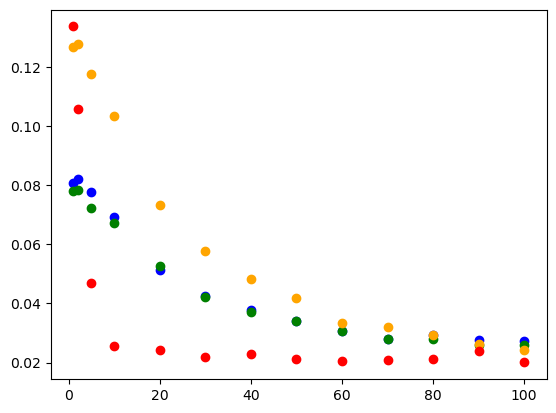

In [8]:
plt.scatter(data_ft_wd0.epochs, data_ft_wd0.sal_top_ssd_2, label = '0', color='blue')
plt.scatter(data_ft_wds.epochs, data_ft_wds.sal_top_ssd_2, label = '0.0001', color='green')
plt.scatter(data_ft_wdm.epochs, data_ft_wdm.sal_top_ssd_2, label = '0.001', color='orange')
plt.scatter(data_ft_wdl.epochs, data_ft_wdl.sal_top_ssd_2, label = '0.01', color='red')

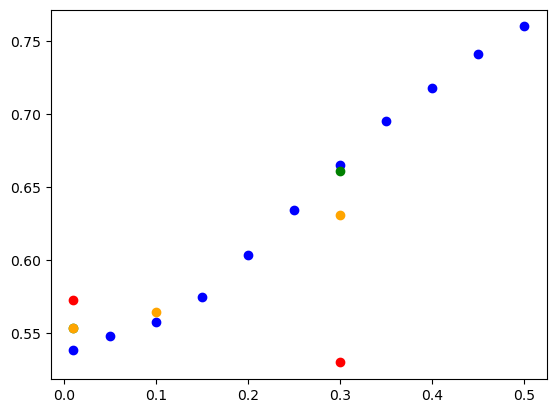

In [41]:
plt.scatter(data_ftt_wd0.threshold, data_ftt_wd0.sal_top_cdc_2, label = '0', color='blue')
plt.scatter(data_ftt_wds.threshold, data_ftt_wds.sal_top_cdc_2, label = '0.0001', color='green')
plt.scatter(data_ftt_wdm.threshold, data_ftt_wdm.sal_top_cdc_2, label = '0.001', color='orange')
plt.scatter(data_ftt_wdl.threshold, data_ftt_wdl.sal_top_cdc_2, label = '0.01', color='red')

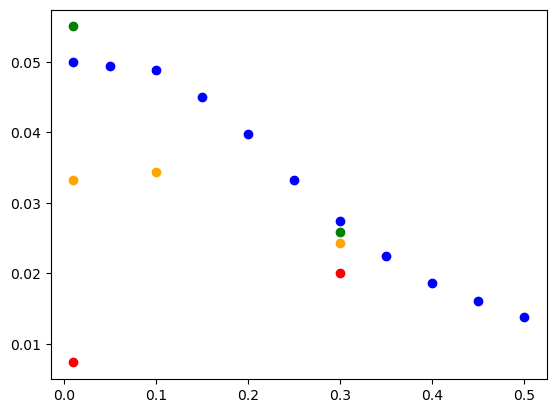

In [42]:
plt.scatter(data_ftt_wd0.threshold, data_ftt_wd0.sal_top_ssd_2, label = '0', color='blue')
plt.scatter(data_ftt_wds.threshold, data_ftt_wds.sal_top_ssd_2, label = '0.0001', color='green')
plt.scatter(data_ftt_wdm.threshold, data_ftt_wdm.sal_top_ssd_2, label = '0.001', color='orange')
plt.scatter(data_ftt_wdl.threshold, data_ftt_wdl.sal_top_ssd_2, label = '0.01', color='red')

In [77]:
baselineres = data_relu[(data_relu.threshold == 0.1) & (data_relu.epochs == 100) & (data_relu.weight_decay == 0)]

In [115]:
baselineres.shap_top_ssd_2

1989    0.04796
Name: shap_top_ssd_2, dtype: float64

## Dataset shift

In [57]:
shift = pd.read_csv('results/whobin_shift/ep100_avg.csv',index_col=0)
shift_relu = shift[(shift.activation == 'relu') & (shift.lr_decay == 0.97) & (shift.weight_decay == 0)]

In [58]:
dfs = [shift_relu[shift_relu.dataset == 'whobin50_orig'], shift_relu[shift_relu.dataset == 'whobin62_orig'],
        shift_relu[shift_relu.dataset == 'whobin75_orig'], shift_relu[shift_relu.dataset == 'whobin94_orig']]

In [59]:
dfs[0]

,dataset,epochs,threshold,adversarial,activation,lr,lr_decay,weight_decay,beta,epsilon,finetune,fixed_seed,variations,nodes_per_layer,num_layers,train_shift_acc,train_shift_acc_p10,train_shift_acc_p25,train_shift_acc_p50,train_shift_acc_p75,train_shift_acc_p90,train_orig_acc,train_orig_acc_p10,train_orig_acc_p25,train_orig_acc_p50,train_orig_acc_p75,train_orig_acc_p90,test_shift_acc,test_shift_acc_p10,test_shift_acc_p25,test_shift_acc_p50,test_shift_acc_p75,test_shift_acc_p90,test_orig_full_acc,test_orig_full_acc_p10,test_orig_full_acc_p25,test_orig_full_acc_p50,test_orig_full_acc_p75,test_orig_full_acc_p90,train_loss_orig,test_loss_orig,train_loss_shift,test_loss_shift,part_grad_top_a_0,part_grad_top_a_0_p10,part_grad_top_a_0_p25,part_grad_top_a_0_p50,part_grad_top_a_0_p75,part_grad_top_a_0_p90,part_grad_top_sa_0,...,full_sg_top_cdc_3_p75,full_sg_top_cdc_3_p90,full_sg_top_ssd_3,full_sg_top_ssd_3_p10,full_sg_top_ssd_3_p25,full_sg_top_ssd_3_p50,full_sg_top_ssd_3_p75,full_sg_top_ssd_3_p90,full_sg_top_a_4,full_sg_top_a_4_p10,full_sg_top_a_4_p25,full_sg_top_a_4_p50,full_sg_top_a_4_p75,full_sg_top_a_4_p90,full_sg_top_sa_4,full_sg_top_sa_4_p10,full_sg_top_sa_4_p25,full_sg_top_sa_4_p50,full_sg_top_sa_4_p75,full_sg_top_sa_4_p90,full_sg_top_cdc_4,full_sg_top_cdc_4_p10,full_sg_top_cdc_4_p25,full_sg_top_cdc_4_p50,full_sg_top_cdc_4_p75,full_sg_top_cdc_4_p90,full_sg_top_ssd_4,full_sg_top_ssd_4_p10,full_sg_top_ssd_4_p25,full_sg_top_ssd_4_p50,full_sg_top_ssd_4_p75,full_sg_top_ssd_4_p90,full_sg_gradient_raw,full_sg_gradient_raw_p10,full_sg_gradient_raw_p25,full_sg_gradient_raw_p50,full_sg_gradient_raw_p75,full_sg_gradient_raw_p90,full_sg_gradient_normed,full_sg_gradient_normed_p10,full_sg_gradient_normed_p25,full_sg_gradient_normed_p50,full_sg_gradient_normed_p75,full_sg_gradient_normed_p90,full_sg_gradient_angle,full_sg_gradient_angle_p10,full_sg_gradient_angle_p25,full_sg_gradient_angle_p50,full_sg_gradient_angle_p75,full_sg_gradient_angle_p90
0,whobin50_orig,1,0.0,False,relu,0.4,0.97,0.0,5.0,0.5,False,1.0,100.0,50.0,5.0,0.538770,0.526321,0.530510,0.538707,0.541439,0.551730,0.512987,0.485428,0.498406,0.508197,0.526412,0.545628,0.576981,0.538251,0.538251,0.538251,0.552254,0.752596,0.531694,0.461749,0.461749,0.538251,0.541667,0.666667,0.686912,0.692646,0.674213,0.689506,0.417678,0.322404,0.354508,0.404372,0.470628,0.530601,0.417186,...,0.032787,0.035519,0.903019,0.898907,0.900273,0.903005,0.905738,0.907104,0.955923,0.950000,0.952937,0.956284,0.958811,0.961230,0.955546,0.949454,0.952664,0.956011,0.958470,0.961230,0.034399,0.023224,0.026981,0.032787,0.040984,0.047951,0.900820,0.898907,0.898907,0.900273,0.901639,0.904372,0.000162,0.000051,0.000072,0.000109,0.000196,0.000308,1.638487e-01,0.095420,0.109211,0.149086,0.188638,2.505620e-01,1.478314,1.470225,1.472936,1.478667,1.482717,1.488222
15,whobin50_orig,2,0.0,False,relu,0.4,0.97,0.0,5.0,0.5,False,1.0,100.0,50.0,5.0,0.676639,0.549180,0.578210,0.693761,0.755237,0.794854,0.567623,0.501548,0.525046,0.557832,0.609745,0.637978,0.784085,0.544945,0.756489,0.833333,0.853825,0.862158,0.622937,0.461749,0.492145,0.576503,0.752391,0.821038,0.579429,0.687604,0.367290,0.682056,0.190109,0.073497,0.109290,0.177596,0.273224,0.325683,0.180492,...,0.061475,0.064344,0.899221,0.897541,0.897541,0.898907,0.900273,0.901639,0.944055,0.937432,0.940369,0.943716,0.946858,0.949454,0.940738,0.932760,0.935656,0.940027,0.944399,0.948115,0.061107,0.049044,0.054645,0.061475,0.069672,0.073907,0.898497,0.897541,0.897541,0.897541,0.898907,0.900273,0.003022,0.000330,0.000786,0.003224,0.004802,0.005364,1.527382e+00,0.406439,0.739938,1.634393,2.099944,2.526305e+00,1.506735,1.492260,1.499462,1.508482,1.515462,1.520968
30,whobin50_orig,5,0.0,False,relu,0.4,0.97,0.0,5.0,0.5,False,1.0,100.0,50.0,5.0,0.895861,0.884335,0.889686,0.897541,0.902209,0.905738,0.811958,0.772131,0.799636,0.823770,0.837887,0.848998,0.869836,0.804372,0.853484,0.886612,0.898907,0.907104,0.840505,0.811202,0.834699,0.849727,0.864754,0.875683,0.257743,0.384796,0.511028,

In [67]:
for c in dfs[0].columns:
    if 'sal_gradient_angle' in c:
        print(c)

part_sal_gradient_angle
part_sal_gradient_angle_p10
part_sal_gradient_angle_p25
part_sal_gradient_angle_p50
part_sal_gradient_angle_p75
part_sal_gradient_angle_p90
full_sal_gradient_angle
full_sal_gradient_angle_p10
full_sal_gradient_angle_p25
full_sal_gradient_angle_p50
full_sal_gradient_angle_p75
full_sal_gradient_angle_p90


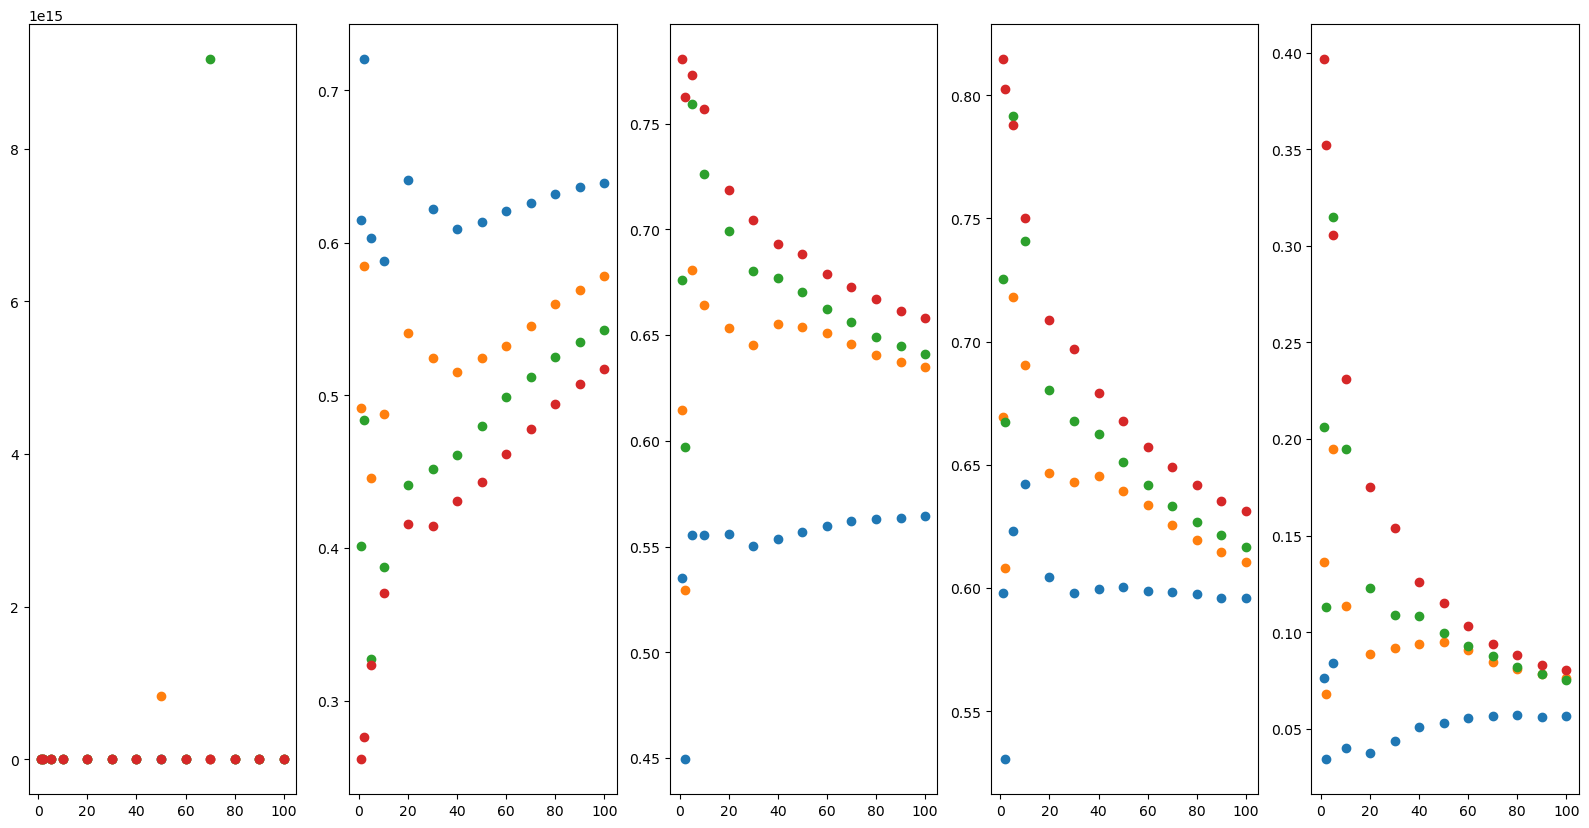

In [71]:
fig, axs = plt.subplots(1,5, figsize=(20,10))
for d in dfs:
    axs[0].scatter(d.epochs, d.full_sal_gradient_normed, label = '0')
    axs[1].scatter(d.epochs, d.full_sal_gradient_angle, label = '0')
    axs[2].scatter(d.epochs, d.full_sal_top_sa_2, label = '0')
    axs[3].scatter(d.epochs, d.full_sal_top_sa_4, label = '0')
    axs[4].scatter(d.epochs, d.full_sal_top_ssd_3, label = '0')


In [3]:
data = pd.read_csv('results/whobin_shift/shift_avg.csv')

In [10]:
data[(data.dataset=='whobin75_orig') & (data.activation == 'relu') & (data.lr_decay==0.97) & (data.weight_decay==0.0001)]

,Unnamed: 0,dataset,epochs,threshold,adversarial,activation,lr,lr_decay,weight_decay,beta,epsilon,finetune,fixed_seed,variations,nodes_per_layer,num_layers,train_shift_acc,train_shift_acc_p10,train_shift_acc_p25,train_shift_acc_p50,train_shift_acc_p75,train_shift_acc_p90,train_orig_acc,train_orig_acc_p10,train_orig_acc_p25,train_orig_acc_p50,train_orig_acc_p75,train_orig_acc_p90,test_shift_acc,test_shift_acc_p10,test_shift_acc_p25,test_shift_acc_p50,test_shift_acc_p75,test_shift_acc_p90,test_orig_full_acc,test_orig_full_acc_p10,test_orig_full_acc_p25,test_orig_full_acc_p50,test_orig_full_acc_p75,test_orig_full_acc_p90,train_loss_orig,test_loss_orig,train_loss_shift,test_loss_shift,part_grad_top_a_0,part_grad_top_a_0_p10,part_grad_top_a_0_p25,part_grad_top_a_0_p50,part_grad_top_a_0_p75,part_grad_top_a_0_p90,...,full_sg_top_cdc_3_p75,full_sg_top_cdc_3_p90,full_sg_top_ssd_3,full_sg_top_ssd_3_p10,full_sg_top_ssd_3_p25,full_sg_top_ssd_3_p50,full_sg_top_ssd_3_p75,full_sg_top_ssd_3_p90,full_sg_top_a_4,full_sg_top_a_4_p10,full_sg_top_a_4_p25,full_sg_top_a_4_p50,full_sg_top_a_4_p75,full_sg_top_a_4_p90,full_sg_top_sa_4,full_sg_top_sa_4_p10,full_sg_top_sa_4_p25,full_sg_top_sa_4_p50,full_sg_top_sa_4_p75,full_sg_top_sa_4_p90,full_sg_top_cdc_4,full_sg_top_cdc_4_p10,full_sg_top_cdc_4_p25,full_sg_top_cdc_4_p50,full_sg_top_cdc_4_p75,full_sg_top_cdc_4_p90,full_sg_top_ssd_4,full_sg_top_ssd_4_p10,full_sg_top_ssd_4_p25,full_sg_top_ssd_4_p50,full_sg_top_ssd_4_p75,full_sg_top_ssd_4_p90,full_sg_gradient_raw,full_sg_gradient_raw_p10,full_sg_gradient_raw_p25,full_sg_gradient_raw_p50,full_sg_gradient_raw_p75,full_sg_gradient_raw_p90,full_sg_gradient_normed,full_sg_gradient_normed_p10,full_sg_gradient_normed_p25,full_sg_gradient_normed_p50,full_sg_gradient_normed_p75,full_sg_gradient_normed_p90,full_sg_gradient_angle,full_sg_gradient_angle_p10,full_sg_gradient_angle_p25,full_sg_gradient_angle_p50,full_sg_gradient_angle_p75,full_sg_gradient_angle_p90
404,404,whobin75_orig,1,0.0,False,relu,0.4,0.97,0.0001,5.0,0.5,False,1.0,100.0,50.0,5.0,0.537222,0.506603,0.513661,0.528916,0.552937,0.583197,0.525932,0.495993,0.508500,0.525501,0.541135,0.559381,0.564522,0.494536,0.505464,0.505464,0.585041,0.748770,0.584208,0.494536,0.505464,0.508880,0.673839,0.772131,0.688734,0.691197,0.678196,0.685341,0.545118,0.425683,0.493625,0.561931,0.603370,0.637705,...,0.008197,0.012432,0.914057,0.907104,0.909836,0.912568,0.918374,0.922131,0.969295,0.963060,0.967213,0.970219,0.972473,0.974891,0.969208,0.961995,0.967213,0.970219,0.972473,0.974891,0.009781,0.002732,0.004098,0.008197,0.011270,0.019126,0.909863,0.903005,0.905738,0.909836,0.913934,0.916667,0.000128,0.000038,0.000054,0.000091,0.000153,0.000217,9.026091e-02,0.058246,0.068633,0.082211,0.102916,0.120651,1.455068,1.447540,1.450196,1.454426,1.457998,1.463075
420,420,whobin75_orig,2,0.0,False,relu,0.4,0.97,0.0001,5.0,0.5,False,1.0,100.0,50.0,5.0,0.713197,0.585974,0.640938,0.722222,0.793260,0.823953,0.636746,0.533455,0.566181,0.623558,0.697936,0.756588,0.759836,0.539208,0.769126,0.803962,0.818648,0.829235,0.711940,0.505464,0.635587,0.771858,0.804645,0.812842,0.579088,0.674647,0.392944,0.640879,0.297650,0.163206,0.215847,0.294171,0.373406,0.448634,...,0.036885,0.042486,0.905164,0.898907,0.901298,0.904372,0.908470,0.912568,0.956945,0.949180,0.953005,0.956557,0.961202,0.964617,0.954634,0.945055,0.949385,0.954098,0.960178,0.963934,0.033374,0.016257,0.025615,0.034836,0.042350,0.047814,0.902514,0.898907,0.900273,0.901639,0.904372,0.907240,0.002481,0.000275,0.000702,0.002801,0.003736,0.004552,4.404801e-01,0.188688,0.272089,0.428011,0.572873,0.704221,1.482546,1.464887,1.472166,1.481674,1.492737,1.499017
436,436,whobin75_orig,5,0.0,False,relu,0.4,0.97,0.0001,5.0,0.5,False,1.0,100.0,50.0,5.0,0.892678,0.881967,0.888320,0.893898,0.898452,0.902140,0.853054,0.833637,0.841985,0.853370,0.867183,0.872678,0.859481,0.828142,0.850068,0.868852,0.878415,0.885383,0.858333,0.822268,0.846653,0.864754,0.875683,0.885246,0.252212,0.303010,0.277021,0.378639,

## Finetuning

In [11]:
data_nn = pd.read_csv('results/whobin/fixed_seed_avg.csv',index_col=0)
data_nn = data_nn[data_nn.finetune == True]

In [48]:
d = data_nn[(data_nn.activation == 'soft') & (data_nn.epochs == 100) ]

In [49]:
d

,dataset,epochs,threshold,adversarial,activation,lr,lr_decay,weight_decay,beta,epsilon,finetune,fixed_seed,variations,nodes_per_layer,num_layers,train_acc,train_acc_p10,train_acc_p25,train_acc_p50,train_acc_p75,train_acc_p90,test_acc,test_acc_p10,test_acc_p25,test_acc_p50,test_acc_p75,test_acc_p90,train_loss,test_loss,grad_top_a_0,grad_top_a_0_p10,grad_top_a_0_p25,grad_top_a_0_p50,grad_top_a_0_p75,grad_top_a_0_p90,grad_top_sa_0,grad_top_sa_0_p10,grad_top_sa_0_p25,grad_top_sa_0_p50,grad_top_sa_0_p75,grad_top_sa_0_p90,grad_top_cdc_0,grad_top_cdc_0_p10,grad_top_cdc_0_p25,grad_top_cdc_0_p50,grad_top_cdc_0_p75,grad_top_cdc_0_p90,grad_top_ssd_0,grad_top_ssd_0_p10,grad_top_ssd_0_p25,...,shap_top_cdc_3_p75,shap_top_cdc_3_p90,shap_top_ssd_3,shap_top_ssd_3_p10,shap_top_ssd_3_p25,shap_top_ssd_3_p50,shap_top_ssd_3_p75,shap_top_ssd_3_p90,shap_top_a_4,shap_top_a_4_p10,shap_top_a_4_p25,shap_top_a_4_p50,shap_top_a_4_p75,shap_top_a_4_p90,shap_top_sa_4,shap_top_sa_4_p10,shap_top_sa_4_p25,shap_top_sa_4_p50,shap_top_sa_4_p75,shap_top_sa_4_p90,shap_top_cdc_4,shap_top_cdc_4_p10,shap_top_cdc_4_p25,shap_top_cdc_4_p50,shap_top_cdc_4_p75,shap_top_cdc_4_p90,shap_top_ssd_4,shap_top_ssd_4_p10,shap_top_ssd_4_p25,shap_top_ssd_4_p50,shap_top_ssd_4_p75,shap_top_ssd_4_p90,shap_gradient_raw,shap_gradient_raw_p10,shap_gradient_raw_p25,shap_gradient_raw_p50,shap_gradient_raw_p75,shap_gradient_raw_p90,shap_gradient_normed,shap_gradient_normed_p10,shap_gradient_normed_p25,shap_gradient_normed_p50,shap_gradient_normed_p75,shap_gradient_normed_p90,shap_gradient_angle,shap_gradient_angle_p10,shap_gradient_angle_p25,shap_gradient_angle_p50,shap_gradient_angle_p75,shap_gradient_angle_p90
2276,whobin,100,0.01,False,soft,0.42,1.0,0.0000,2.0,0.5,1,1.0,100.0,50.0,5.0,0.922664,0.920765,0.921676,0.922587,0.923953,0.924408,0.895085,0.882514,0.885246,0.893443,0.904372,0.910656,0.167820,0.229306,0.683251,0.678415,0.681148,0.683470,0.685314,0.687705,0.615519,0.610628,0.613046,0.615847,0.618033,0.620246,0.262661,0.257596,0.260109,0.262295,0.265301,0.268087,0.615519,0.610628,0.613046,...,0.6440,0.6480,0.05138,0.0480,0.048,0.052,0.0520,0.0580,0.513264,0.50760,0.5096,0.5132,0.5168,0.51848,0.450104,0.44476,0.4472,0.4496,0.4532,0.45600,0.71186,0.6980,0.7040,0.712,0.7200,0.7240,0.03416,0.0280,0.0335,0.034,0.0380,0.0380,5.676168e-01,5.633843e-01,5.652031e-01,5.673308e-01,5.700031e-01,5.722781e-01,1.064886,1.054783,1.058747,1.064703,1.070385,1.075700,0.980883,0.976470,0.978375,0.980801,0.983013,0.985523
2277,whobin,100,0.01,False,soft,0.42,1.0,0.0000,5.0,0.5,1,1.0,100.0,50.0,5.0,0.939006,0.930783,0.938069,0.940346,0.942168,0.943534,0.908305,0.894809,0.896175,0.913934,0.918033,0.919399,0.135391,0.236718,0.654847,0.645820,0.649454,0.654098,0.659973,0.664863,0.602492,0.593142,0.597268,0.602459,0.607582,0.611858,0.242396,0.235191,0.239003,0.242760,0.246038,0.248989,0.602492,0.593142,0.597268,...,0.7340,0.7420,0.03490,0.0300,0.034,0.036,0.0360,0.0380,0.482300,0.47472,0.4786,0.4822,0.4864,0.49000,0.395492,0.38832,0.3912,0.3956,0.3993,0.40284,0.77224,0.7580,0.7660,0.771,0.7800,0.7880,0.02458,0.0240,0.0240,0.024,0.0240,0.0280,7.416672e-01,7.283369e-01,7.351281e-01,7.412446e-01,7.485515e-01,7.537887e-01,1.417897,1.366969,1.388295,1.413083,1.443879,1.477264,1.103657,1.093625,1.098651,1.103771,1.108511,1.114081
2278,whobin,100,0.01,False,soft,0.42,1.0,0.0001,2.0,0.5,1,1.0,100.0,50.0,5.0,0.921523,0.919399,0.920310,0.921676,0.922587,0.923497,0.894709,0.881148,0.885246,0.892077,0.904372,0.909836,0.169739,0.231871,0.682989,0.680027,0.681148,0.683060,0.684699,0.686366,0.614511,0.610902,0.612568,0.614481,0.616393,0.618060,0.265169,0.261202,0.263115,0.265301,0.266940,0.268607,0.614511,0.610902,0.612568,...,0.6545,0.6620,0.04756,0.0400,0.046,0.048,0.0500,0.0540,0.512996,0.50792,0.5092,0.5132,0.5156,0.51840,0.448508,0.44316,0.4460,0.4484,0.4508,0.45360,0.71802,0.7080,0.7100,0.720,0.7245,0.7300,0.03572,0.0320,0.0340,0.034,0.0380,0.0380,5.581741e-01,5.538493e-01,5.556923e-01,5.579667e-01,5.606094e-01,5.627342e

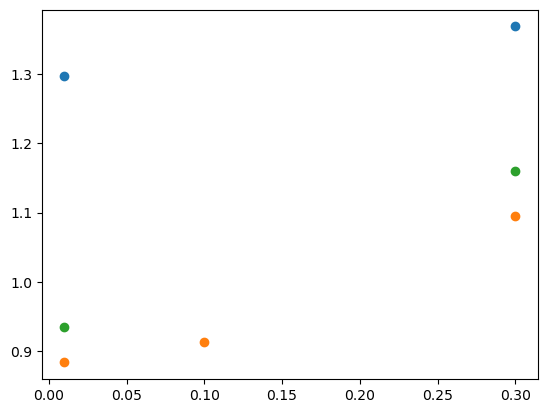

In [41]:
plt.scatter(d[d.weight_decay==0.01].threshold, d[d.weight_decay==0.01].grad_gradient_angle_p50)
plt.scatter(d[d.weight_decay==0.001].threshold, d[d.weight_decay==0.001].grad_gradient_angle_p50)
plt.scatter(d[d.weight_decay==0.0001].threshold, d[d.weight_decay==0.0001].grad_gradient_angle_p50)



In [33]:
for c in d:
    if 'gradient' in c:
        print(c)

grad_gradient_raw
grad_gradient_raw_p10
grad_gradient_raw_p25
grad_gradient_raw_p50
grad_gradient_raw_p75
grad_gradient_raw_p90
grad_gradient_normed
grad_gradient_normed_p10
grad_gradient_normed_p25
grad_gradient_normed_p50
grad_gradient_normed_p75
grad_gradient_normed_p90
grad_gradient_angle
grad_gradient_angle_p10
grad_gradient_angle_p25
grad_gradient_angle_p50
grad_gradient_angle_p75
grad_gradient_angle_p90
sal_gradient_raw
sal_gradient_raw_p10
sal_gradient_raw_p25
sal_gradient_raw_p50
sal_gradient_raw_p75
sal_gradient_raw_p90
sal_gradient_normed
sal_gradient_normed_p10
sal_gradient_normed_p25
sal_gradient_normed_p50
sal_gradient_normed_p75
sal_gradient_normed_p90
sal_gradient_angle
sal_gradient_angle_p10
sal_gradient_angle_p25
sal_gradient_angle_p50
sal_gradient_angle_p75
sal_gradient_angle_p90
sg_gradient_raw
sg_gradient_raw_p10
sg_gradient_raw_p25
sg_gradient_raw_p50
sg_gradient_raw_p75
sg_gradient_raw_p90
sg_gradient_normed
sg_gradient_normed_p10
sg_gradient_normed_p25
sg_gradie

what was WHO year??

In [50]:
data = pd.read_csv('../../data/who/who.csv')

In [55]:
ary = np.array(data.Year)

In [56]:
np.percentile(ary,75)

2012.0

In [60]:
data[data.Year<2012]

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
5,Afghanistan,2010,Developing,58.8,279.0,74,0.01,79.679367,66.0,1989,16.7,102,66.0,9.20,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2
6,Afghanistan,2009,Developing,58.6,281.0,77,0.01,56.762217,63.0,2861,16.2,106,63.0,9.42,63.0,0.1,445.893298,284331.0,18.6,18.7,0.434,8.9
7,Afghanistan,2008,Developing,58.1,287.0,80,0.03,25.873925,64.0,1599,15.7,110,64.0,8.33,64.0,0.1,373.361116,2729431.0,18.8,18.9,0.433,8.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,27.1,42,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,26.7,41,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,26.3,40,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,25.9,39,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [61]:
2379/2938

0.8097345132743363